### Evaluating the Causal Impact of Public Policies in Spain: An Application of Bayesian Structural Time Series Models
Matilla-Muñoz (2024)


In [1]:
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import numpy as np
from causalimpact import CausalImpact
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error
import seaborn as sns
from scipy.stats import zscore
import random
import warnings
warnings.filterwarnings("ignore")

#### Causal impact analysis with pandemic data

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    136.36             4909.0
Prediction (s.d.)         113.34 (5.93)      4080.14 (213.43)
95% CI                    [100.85, 124.09]   [3630.77, 4467.4]

Absolute effect (s.d.)    23.02 (5.93)       828.86 (213.43)
95% CI                    [12.27, 35.51]     [441.6, 1278.23]

Relative effect (s.d.)    20.31% (5.23%)     20.31% (5.23%)
95% CI                    [10.82%, 31.33%]   [10.82%, 31.33%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


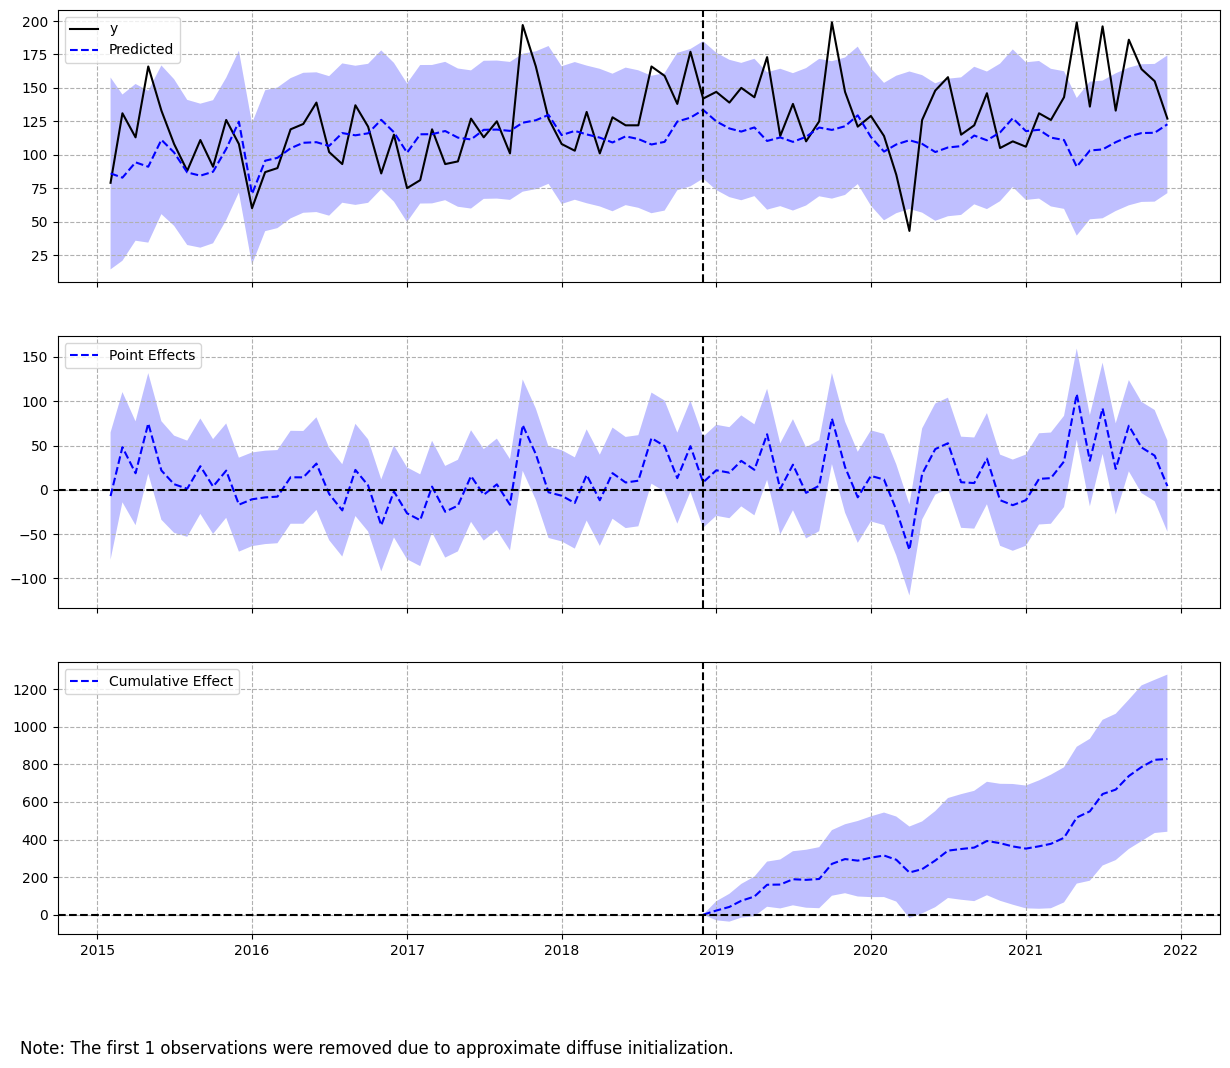

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 136.36. By contrast, in the absence of an
intervention, we would have expected an average response of 113.34.
The 95% interval of this counterfactual prediction is [100.85, 124.09].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 23.02 with a 95% interval of
[12.27, 35.51]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 4909.0.
By contrast, had the intervention not taken place, we would have expected
a sum of 4080.14. The 95% interval of this prediction is [3630.77, 4467.4].


The above results are given in terms of absolute numbers. In relative
terms, the response 

In [2]:
# Establishing the seed to ensure replicability
np.random.seed(7)
random.seed(7)

# Load the data
df = pd.read_excel("datasetok.xls")

# Ensure 'fecha' is in datetime format
df['fecha'] = pd.to_datetime(df['fecha'])

# Set 'fecha' as the index
df.set_index('fecha', inplace=True)

# Variable is in the first column
df = df[['odio', 'odio_de', 'odio_fi']]

# Define pre-intervention and post-intervention periods
pre_period = ['2015-01-01', '2018-12-01']
post_period = ['2019-01-01', '2021-12-01']

# Run CausalImpact analysis
impact = CausalImpact(df, pre_period, post_period)

# Print summary and plot results
print(impact.summary())
impact.plot()
plt.show()
print(impact.summary('report'))

#### Causal impact analysis excluding 2020 data

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    146.17             3508.0
Prediction (s.d.)         114.79 (6.49)      2754.84 (155.78)
95% CI                    [102.63, 128.07]   [2463.17, 3073.8]

Absolute effect (s.d.)    31.38 (6.49)       753.16 (155.78)
95% CI                    [18.09, 43.53]     [434.2, 1044.83]

Relative effect (s.d.)    27.34% (5.65%)     27.34% (5.65%)
95% CI                    [15.76%, 37.93%]   [15.76%, 37.93%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


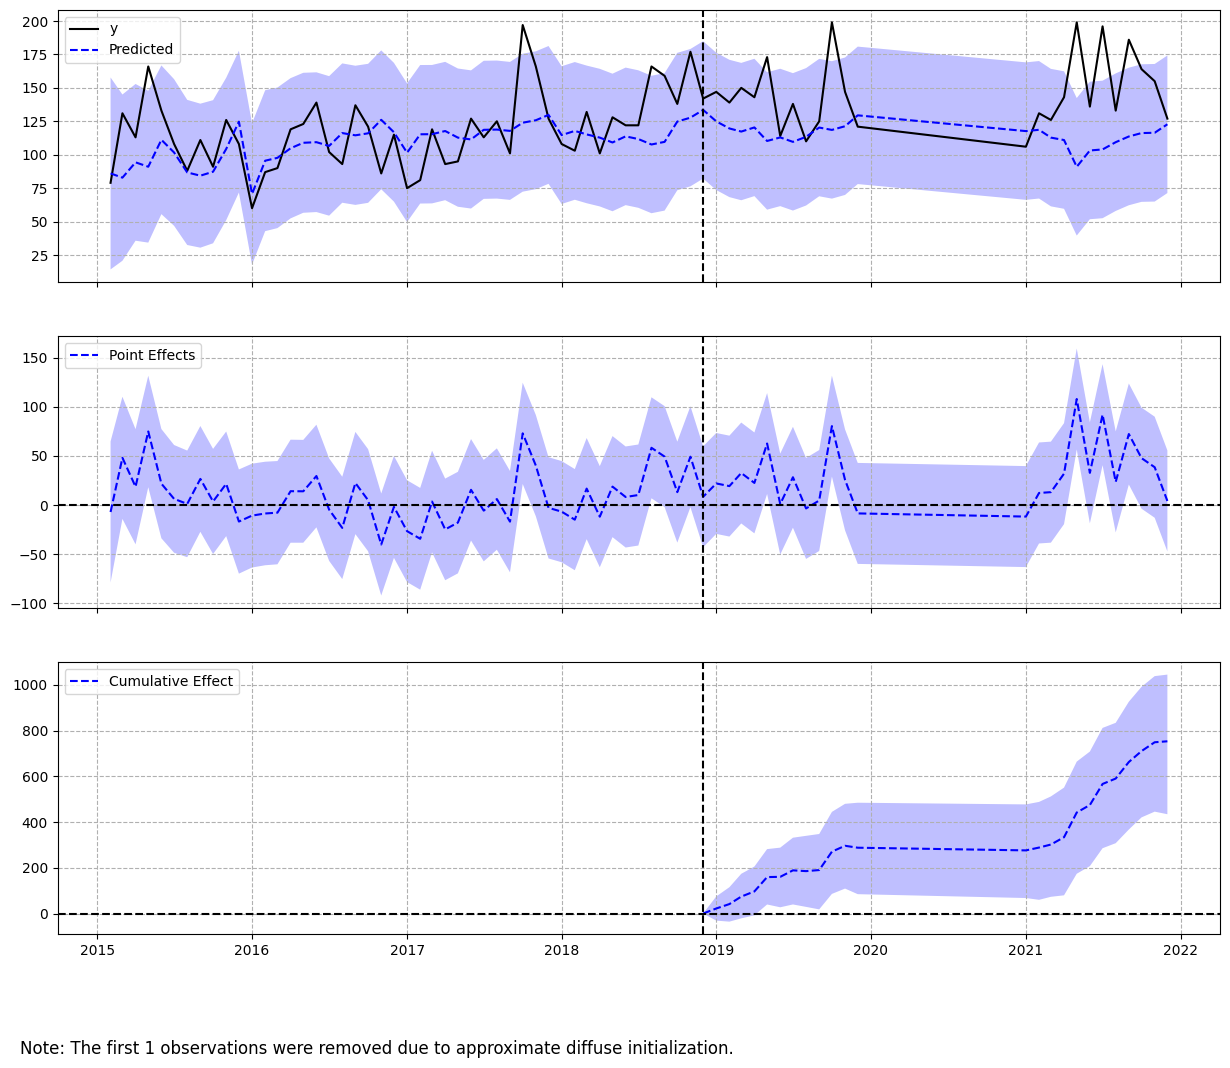

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 146.17. By contrast, in the absence of an
intervention, we would have expected an average response of 114.79.
The 95% interval of this counterfactual prediction is [102.63, 128.07].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 31.38 with a 95% interval of
[18.09, 43.53]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 3508.0.
By contrast, had the intervention not taken place, we would have expected
a sum of 2754.84. The 95% interval of this prediction is [2463.17, 3073.8].


The above results are given in terms of absolute numbers. In relative
terms, the response 

In [3]:
# Establishing the seed to ensure replicability
np.random.seed(7)
random.seed(7)
# Load the data
df = pd.read_excel("datasetok.xls")

# Ensure 'fecha' is in datetime format
df['fecha'] = pd.to_datetime(df['fecha'])

# Exclude data from the year 2020
df = df[df['fecha'].dt.year != 2020]

# Set 'fecha' as the index
df.set_index('fecha', inplace=True)

# Ensure the response variable is in the first column
df = df[['odio', 'odio_de', 'odio_fi']]

# Create adjusted DataFrame excluding 2020
# Pre-intervention data
pre_data = df.loc['2015-01-01':'2018-12-01']

# Post-intervention data (excluding 2020)
post_data = pd.concat([
    df.loc['2019-01-01':'2019-12-01'],
    df.loc['2021-01-01':'2021-12-01']
])

# Combine pre-intervention and post-intervention data
df_adjusted = pd.concat([pre_data, post_data])

# Sort the DataFrame by index
df_adjusted.sort_index(inplace=True)

# Define pre_period and post_period using dates from the index
pre_period = [pre_data.index[0], pre_data.index[-1]]
post_period = [post_data.index[0], post_data.index[-1]]

# Run CausalImpact analysis
impact = CausalImpact(df_adjusted, pre_period, post_period)

# Print summary and plot results
print(impact.summary())
impact.plot()
plt.show()
print(impact.summary('report'))

#### DiD analysis with normalized 2020 data

                            OLS Regression Results                            
Dep. Variable:         hate_incidents   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     3.723
Date:                Sat, 16 Nov 2024   Prob (F-statistic):             0.0120
Time:                        14:15:12   Log-Likelihood:                -352.02
No. Observations:                 252   AIC:                             712.0
Df Residuals:                     248   BIC:                             726.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.1135      0.10

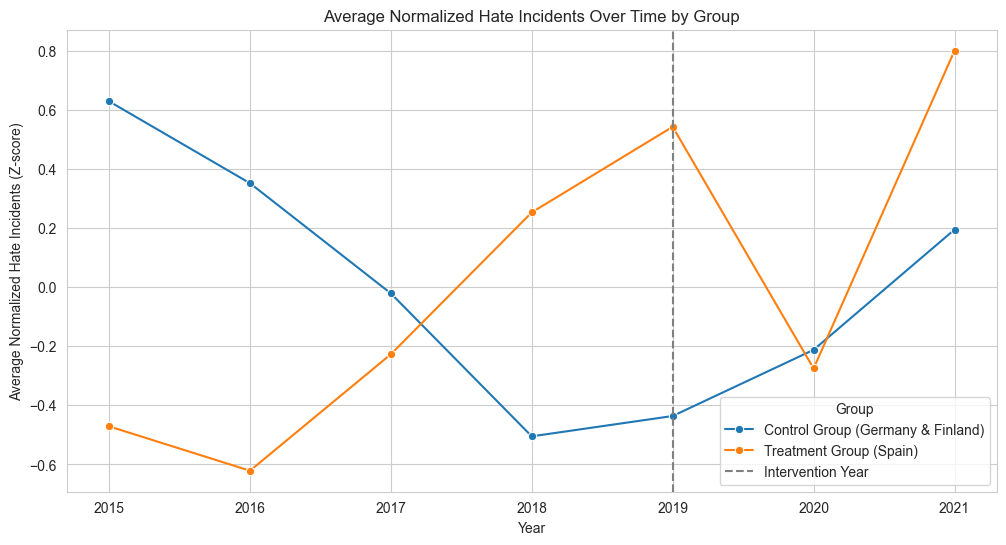

In [4]:
# Load the data
df = pd.read_excel('datasetok.xls')

# Convert 'fecha' to datetime if not already done
df['fecha'] = pd.to_datetime(df['fecha'])

# --- Normalization ---

# Apply Z-score standardization to each country's hate incidents
df['odio_norm'] = zscore(df['odio'])
df['odio_de_norm'] = zscore(df['odio_de'])
df['odio_fi_norm'] = zscore(df['odio_fi'])

# Create a DataFrame for each country using the normalized data
df_spain = df[['fecha', 'odio_norm']].copy()
df_spain['country'] = 'Spain'
df_spain.rename(columns={'odio_norm': 'hate_incidents'}, inplace=True)

df_germany = df[['fecha', 'odio_de_norm']].copy()
df_germany['country'] = 'Germany'
df_germany.rename(columns={'odio_de_norm': 'hate_incidents'}, inplace=True)

df_finland = df[['fecha', 'odio_fi_norm']].copy()
df_finland['country'] = 'Finland'
df_finland.rename(columns={'odio_fi_norm': 'hate_incidents'}, inplace=True)

# Combine into one DataFrame
long_df = pd.concat([df_spain, df_germany, df_finland], ignore_index=True)

# Define treatment group (Spain) and control group (Germany and Finland)
long_df['treatment'] = np.where(long_df['country'] == 'Spain', 1, 0)

# Define pre-intervention and post-intervention periods
# Intervention starts from January 1, 2019
long_df['post_intervention'] = np.where(long_df['fecha'] >= '2019-01-01', 1, 0)

# Create interaction term for DiD
long_df['treatment_post'] = long_df['treatment'] * long_df['post_intervention']

# Fit the DiD model using the normalized 'hate_incidents'
model = ols('hate_incidents ~ treatment + post_intervention + treatment_post', data=long_df)
results = model.fit()

# Print the summary of regression results
print(results.summary())

# Extract the year from the date
long_df['year'] = long_df['fecha'].dt.year

# Calculate the average normalized hate incidents per year for each group
average_annual = long_df.groupby(['year', 'treatment'])['hate_incidents'].mean().reset_index()

# Map treatment indicator to group labels
average_annual['Group'] = average_annual['treatment'].map({0: 'Control Group (Germany & Finland)', 1: 'Treatment Group (Spain)'})

# Set the style for seaborn
sns.set_style("whitegrid")

# Create the line plot using normalized values
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_annual, x='year', y='hate_incidents', hue='Group', marker='o')

# Add vertical line to indicate intervention year
plt.axvline(x=2019, color='gray', linestyle='--', label='Intervention Year')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Average Normalized Hate Incidents (Z-score)')
plt.title('Average Normalized Hate Incidents Over Time by Group')
plt.legend(title='Group')
plt.xticks(average_annual['year'].unique())
plt.show()

#### DiD analysis with no standardized 2020

                            OLS Regression Results                            
Dep. Variable:         hate_incidents   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     5.641
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           0.000976
Time:                        14:15:12   Log-Likelihood:                -298.20
No. Observations:                 216   AIC:                             604.4
Df Residuals:                     212   BIC:                             617.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0813      0.09

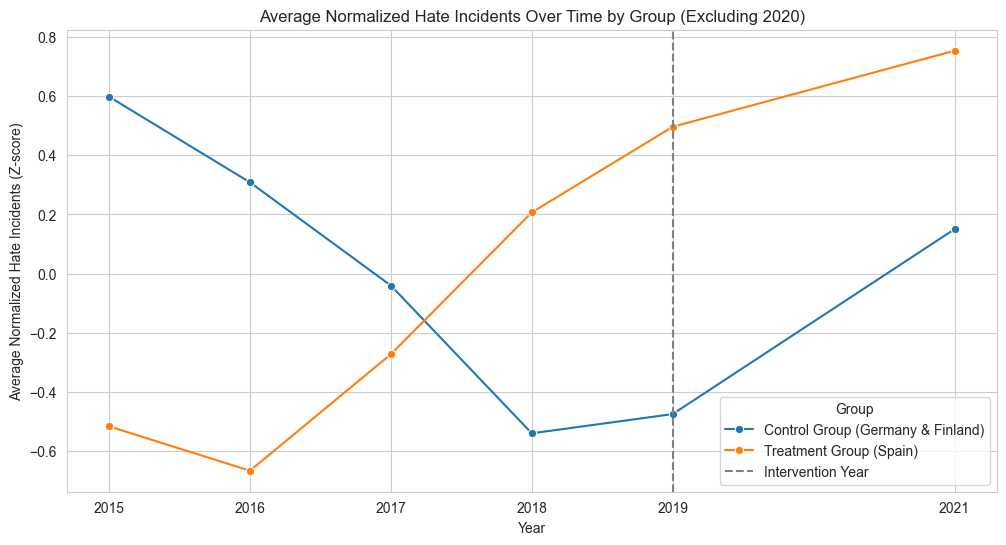

In [5]:
# Load the data
df = pd.read_excel('datasetok.xls')

# Convert 'fecha' to datetime if not already done
df['fecha'] = pd.to_datetime(df['fecha'])

# Exclude data from the year 2020
df = df[df['fecha'].dt.year != 2020]

# --- Normalization ---

# Apply Z-score standardization to each country's hate incidents
# Note: We normalize using data excluding 2020
df['odio_norm'] = zscore(df['odio'])
df['odio_de_norm'] = zscore(df['odio_de'])
df['odio_fi_norm'] = zscore(df['odio_fi'])

# Create a DataFrame for each country using the normalized data
df_spain = df[['fecha', 'odio_norm']].copy()
df_spain['country'] = 'Spain'
df_spain.rename(columns={'odio_norm': 'hate_incidents'}, inplace=True)

df_germany = df[['fecha', 'odio_de_norm']].copy()
df_germany['country'] = 'Germany'
df_germany.rename(columns={'odio_de_norm': 'hate_incidents'}, inplace=True)

df_finland = df[['fecha', 'odio_fi_norm']].copy()
df_finland['country'] = 'Finland'
df_finland.rename(columns={'odio_fi_norm': 'hate_incidents'}, inplace=True)

# Combine into one DataFrame
long_df = pd.concat([df_spain, df_germany, df_finland], ignore_index=True)

# Define treatment group (Spain) and control group (Germany and Finland)
long_df['treatment'] = np.where(long_df['country'] == 'Spain', 1, 0)

# Define pre-intervention and post-intervention periods
# Intervention starts from January 1, 2019
long_df['post_intervention'] = np.where(long_df['fecha'] >= '2019-01-01', 1, 0)

# Create interaction term for DiD
long_df['treatment_post'] = long_df['treatment'] * long_df['post_intervention']

# Fit the DiD model using the normalized 'hate_incidents'
model = ols('hate_incidents ~ treatment + post_intervention + treatment_post', data=long_df)
results = model.fit()

# Print the summary of regression results
print(results.summary())

# Extract the year from the date
long_df['year'] = long_df['fecha'].dt.year

# Calculate the average normalized hate incidents per year for each group
average_annual = long_df.groupby(['year', 'treatment'])['hate_incidents'].mean().reset_index()

# Map treatment indicator to group labels
average_annual['Group'] = average_annual['treatment'].map({0: 'Control Group (Germany & Finland)', 1: 'Treatment Group (Spain)'})

# Set the style for seaborn
sns.set_style("whitegrid")

# Create the line plot using normalized values
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_annual, x='year', y='hate_incidents', hue='Group', marker='o')

# Add vertical line to indicate intervention year
plt.axvline(x=2019, color='gray', linestyle='--', label='Intervention Year')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Average Normalized Hate Incidents (Z-score)')
plt.title('Average Normalized Hate Incidents Over Time by Group (Excluding 2020)')
plt.legend(title='Group')
plt.xticks(average_annual['year'].unique())
plt.show()

#### Test Refutation, Causal Impact, Placebo, Randomized Common Cause and Subset Validation

Original Analysis:
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    136.06             4762.0
Prediction (s.d.)         113.64 (5.82)      3977.57 (203.82)
95% CI                    [101.88, 124.71]   [3565.79, 4364.74]

Absolute effect (s.d.)    22.41 (5.82)       784.43 (203.82)
95% CI                    [11.35, 34.18]     [397.26, 1196.21]

Relative effect (s.d.)    19.72% (5.12%)     19.72% (5.12%)
95% CI                    [9.99%, 30.07%]    [9.99%, 30.07%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


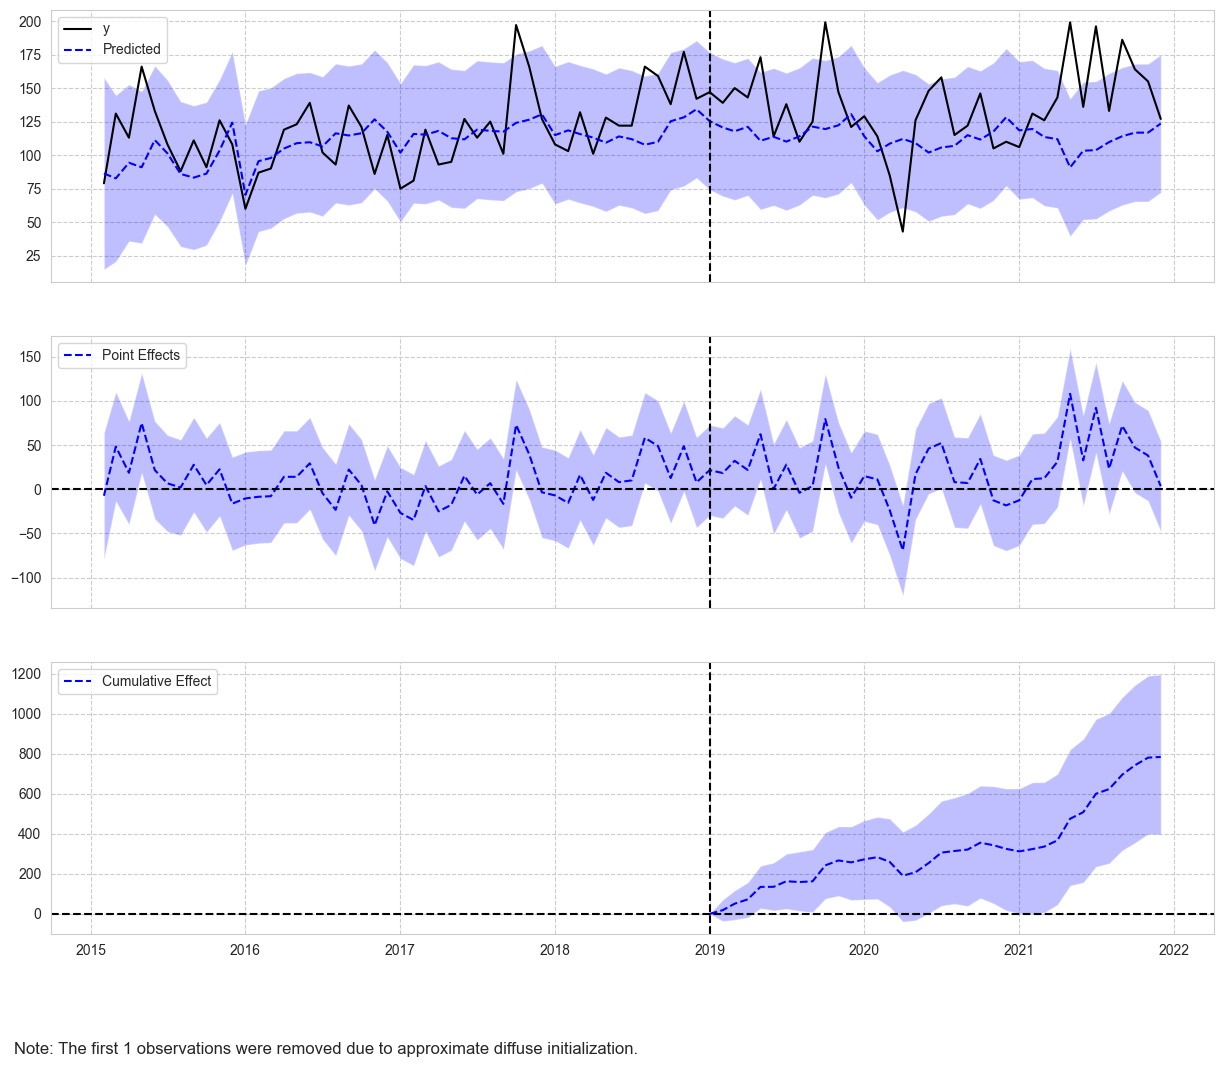


Test de Placebo Treatment:
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    -0.33              -11.61
Prediction (s.d.)         -0.22 (0.23)       -7.69 (7.89)
95% CI                    [-0.68, 0.21]      [-23.75, 7.18]

Absolute effect (s.d.)    -0.11 (0.23)       -3.92 (7.89)
95% CI                    [-0.54, 0.35]      [-18.78, 12.14]

Relative effect (s.d.)    50.9% (102.55%)    50.9% (102.55%)
95% CI                    [-157.8%, 244.19%] [-157.8%, 244.19%]

Posterior tail-area probability p: 0.31
Posterior prob. of a causal effect: 69.13%

For more details run the command: print(impact.summary('report'))


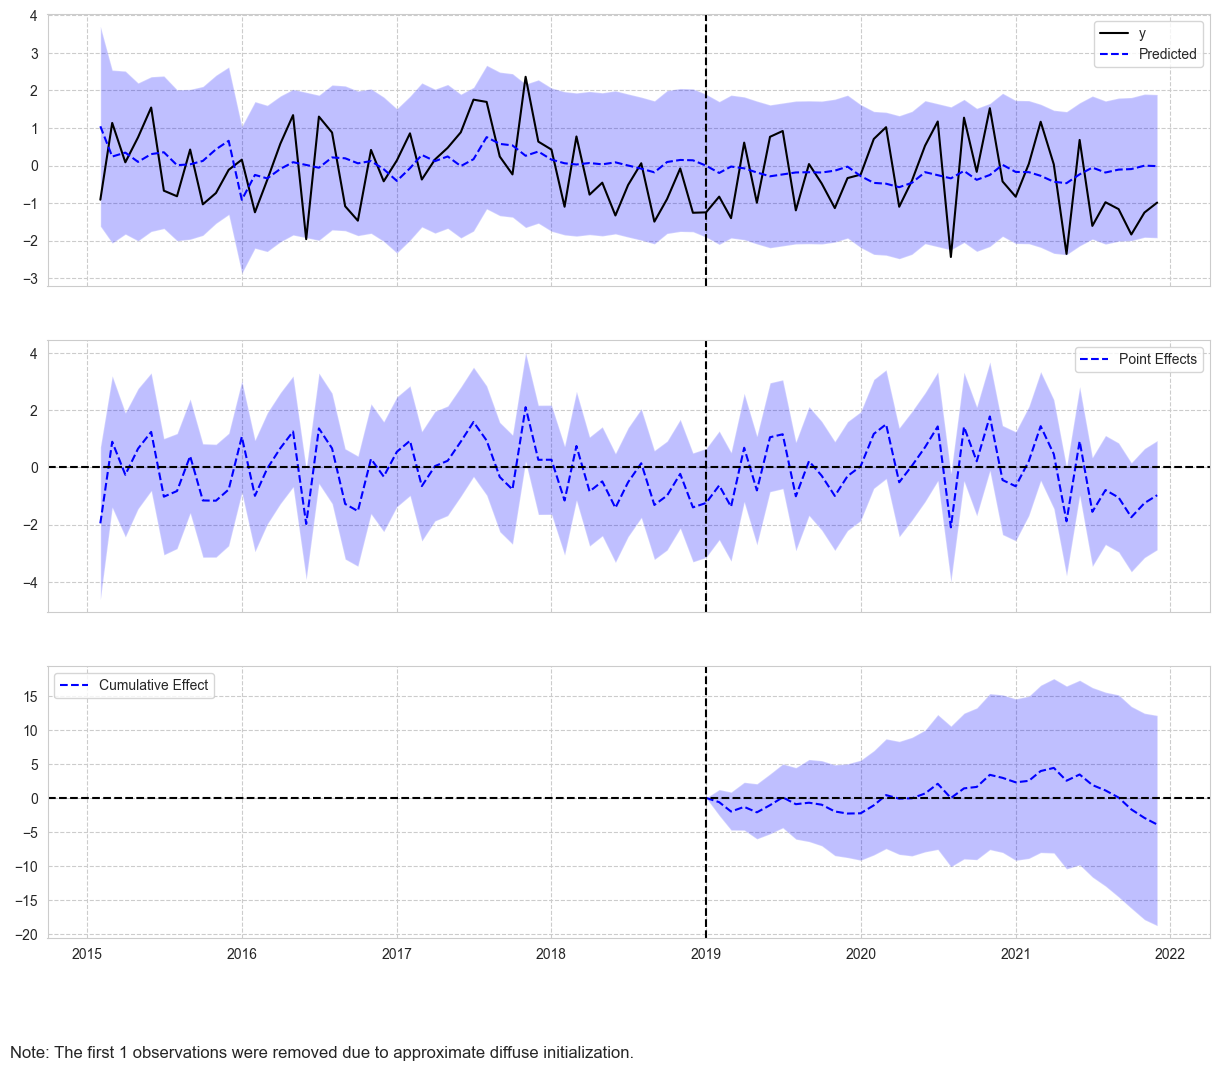


Test Random Common Cause:
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    136.06             4762.0
Prediction (s.d.)         113.31 (5.63)      3965.72 (197.04)
95% CI                    [102.12, 124.19]   [3574.33, 4346.7]

Absolute effect (s.d.)    22.75 (5.63)       796.28 (197.04)
95% CI                    [11.87, 33.93]     [415.3, 1187.67]

Relative effect (s.d.)    20.08% (4.97%)     20.08% (4.97%)
95% CI                    [10.47%, 29.95%]   [10.47%, 29.95%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


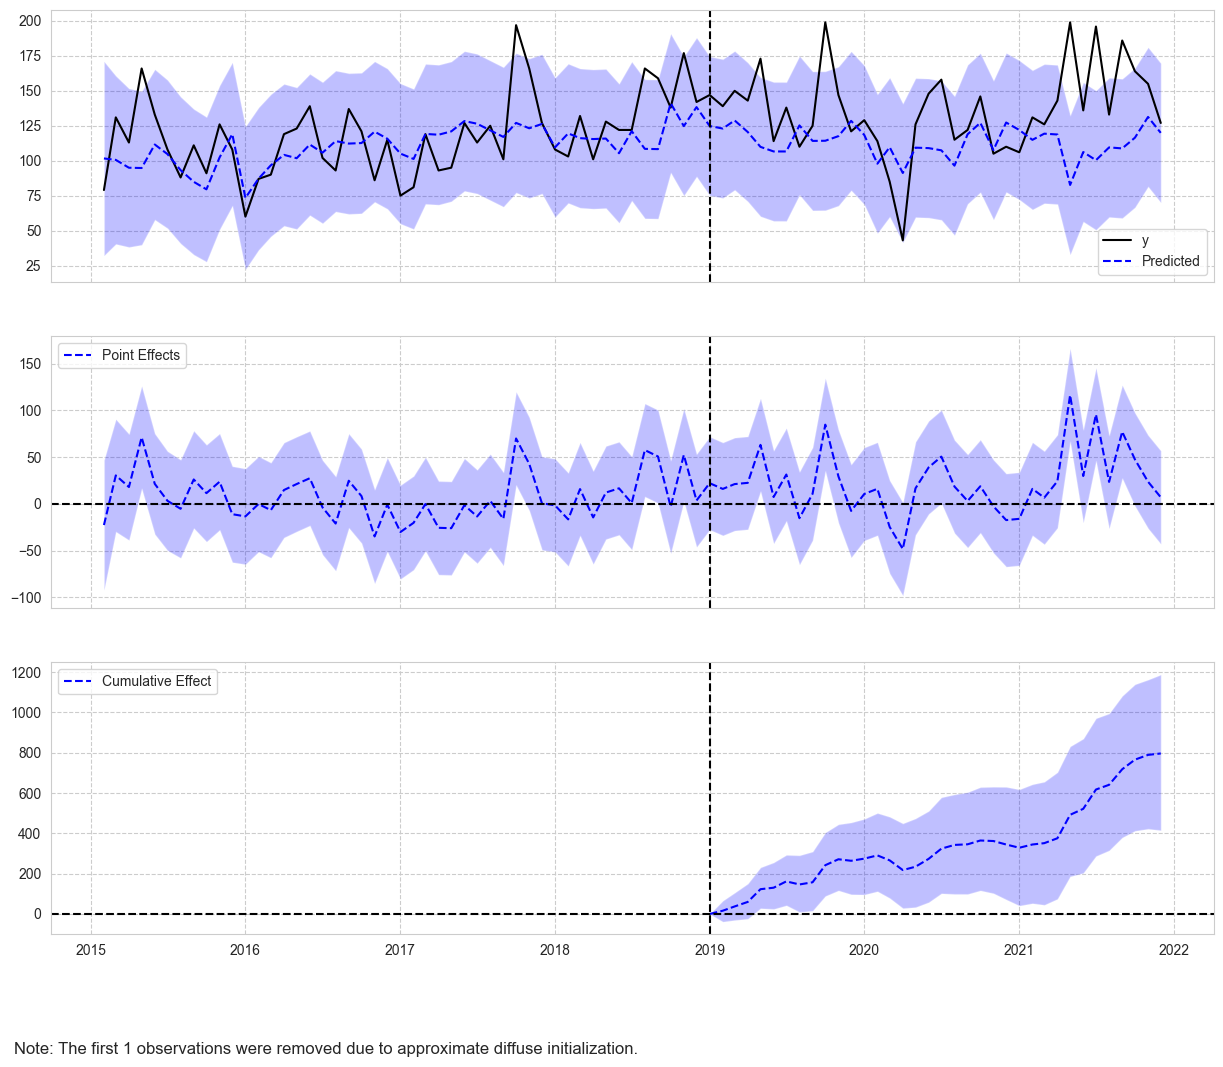


Subset Validation:
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    136.83             3147.0
Prediction (s.d.)         114.55 (7.5)       2634.59 (172.46)
95% CI                    [99.42, 128.81]    [2286.6, 2962.62]

Absolute effect (s.d.)    22.28 (7.5)        512.41 (172.46)
95% CI                    [8.02, 37.41]      [184.38, 860.4]

Relative effect (s.d.)    19.45% (6.55%)     19.45% (6.55%)
95% CI                    [7.0%, 32.66%]     [7.0%, 32.66%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 99.9%

For more details run the command: print(impact.summary('report'))


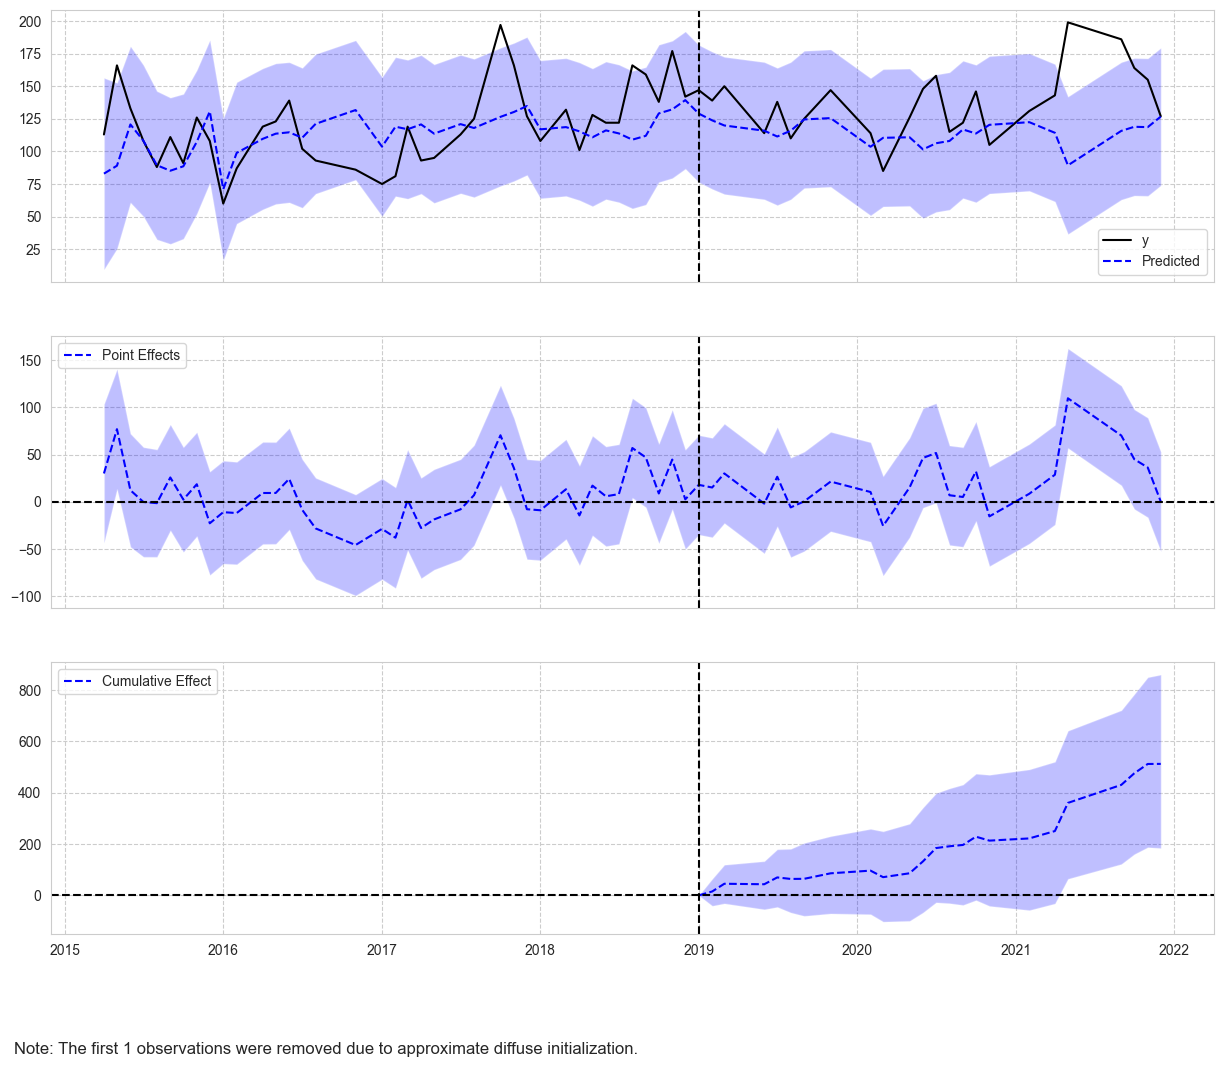

In [6]:
# Establishing the seed to ensure replicability
np.random.seed(7)
random.seed(7)

# Load the data
df = pd.read_excel('datasetok.xls')
df['fecha'] = pd.to_datetime(df['fecha'])
df.set_index('fecha', inplace=True)

# Define pre- and post-intervention periods
pre_period = ['2015-01-01', '2019-01-01']
post_period = ['2019-02-01', '2021-12-01']

# Original Causal Impact Analysis
impact_original = CausalImpact(df[['odio', 'odio_fi', 'odio_de']], pre_period, post_period)
print("Original Analysis:")
print(impact_original.summary())
impact_original.plot()
plt.show()

# Placebo Test Treatment

# Create a placebo variable
df['placebo'] = np.random.normal(size=len(df))

# Analysis with placebo variable
impact_placebo = CausalImpact(df[['placebo', 'odio_fi', 'odio_de']], pre_period, post_period)
print("\nTest de Placebo Treatment:")
print(impact_placebo.summary())
impact_placebo.plot()
plt.show()

# Test de Random Common Cause

# Create random common cause
df['random_cause'] = np.random.normal(size=len(df))

# Analysis with random variable
impact_random_cause = CausalImpact(df[['odio', 'odio_fi', 'odio_de', 'random_cause']], pre_period, post_period)
print("\nTest Random Common Cause:")
print(impact_random_cause.summary())
impact_random_cause.plot()
plt.show()

# Subset Validation

# Selecting a random subset of 75% of the data
subset_df = df.sample(frac=0.75, random_state=42).sort_index()

# Get the available dates in the subset
available_dates = subset_df.index

# Convert period dates to datetime
pre_start_date, pre_end_date = pd.to_datetime(pre_period[0]), pd.to_datetime(pre_period[1])
post_start_date, post_end_date = pd.to_datetime(post_period[0]), pd.to_datetime(post_period[1])

# Define function to find the nearest date
def get_nearest_date(available_dates, target_date):
    nearest_index = available_dates.get_indexer([target_date], method='nearest')[0]
    nearest_date = available_dates[nearest_index]
    return nearest_date

# Find the nearest available dates in the subset
pre_start = get_nearest_date(available_dates, pre_start_date)
pre_end = get_nearest_date(available_dates, pre_end_date)
post_start = get_nearest_date(available_dates, post_start_date)
post_end = get_nearest_date(available_dates, post_end_date)

# Update pre and post periods with new adjusted dates
adjusted_pre_period = [pre_start.strftime('%Y-%m-%d'), pre_end.strftime('%Y-%m-%d')]
adjusted_post_period = [post_start.strftime('%Y-%m-%d'), post_end.strftime('%Y-%m-%d')]

# Analysis with subset of data
impact_subset = CausalImpact(subset_df[['odio', 'odio_fi', 'odio_de']], adjusted_pre_period, adjusted_post_period)
print("\nSubset Validation:")
print(impact_subset.summary())
impact_subset.plot()
plt.show()


### Slots utilized for the Specificity Validation Test

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    118.25             1419.0
Prediction (s.d.)         116.49 (7.65)      1397.84 (91.75)
95% CI                    [101.49, 131.46]   [1217.86, 1577.5]

Absolute effect (s.d.)    1.76 (7.65)        21.16 (91.75)
95% CI                    [-13.21, 16.76]    [-158.5, 201.14]

Relative effect (s.d.)    1.51% (6.56%)      1.51% (6.56%)
95% CI                    [-11.34%, 14.39%]  [-11.34%, 14.39%]

Posterior tail-area probability p: 0.41
Posterior prob. of a causal effect: 59.34%

For more details run the command: print(impact.summary('report'))


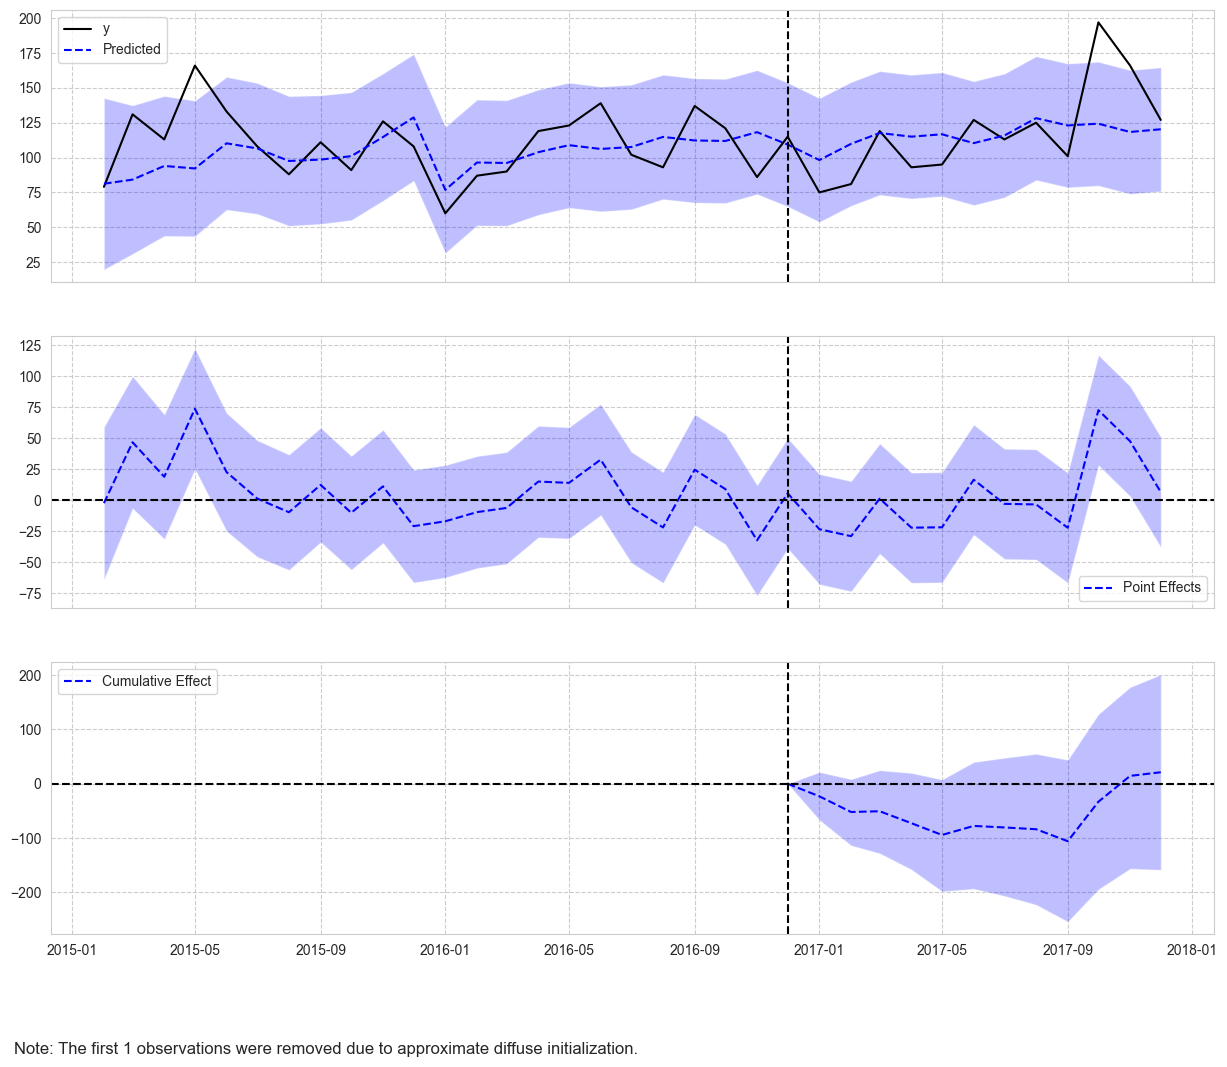

In [7]:
# SLOT 1
# Establish seed to ensure replicability
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

#  Load the data
df = pd.read_excel("datasetok.xls")
df.index = pd.to_datetime(df['fecha'])
df.drop('fecha', axis=1, inplace=True)

# Defines the pre-intervention and post-intervention period.
pre_period = ['2015-01-01', '2016-12-01']
post_period = ['2017-01-01', '2017-12-01']

# Adjusts the model and performs the CausalImpact analysis
impact = CausalImpact(df, pre_period, post_period, random_state=SEED)
print(impact.summary())
impact.plot()

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    118.25             1419.0
Prediction (s.d.)         121.0 (7.22)       1452.05 (86.59)
95% CI                    [106.49, 134.77]   [1277.84, 1617.27]

Absolute effect (s.d.)    -2.75 (7.22)       -33.05 (86.59)
95% CI                    [-16.52, 11.76]    [-198.27, 141.16]

Relative effect (s.d.)    -2.28% (5.96%)     -2.28% (5.96%)
95% CI                    [-13.65%, 9.72%]   [-13.65%, 9.72%]

Posterior tail-area probability p: 0.36
Posterior prob. of a causal effect: 63.84%

For more details run the command: print(impact.summary('report'))


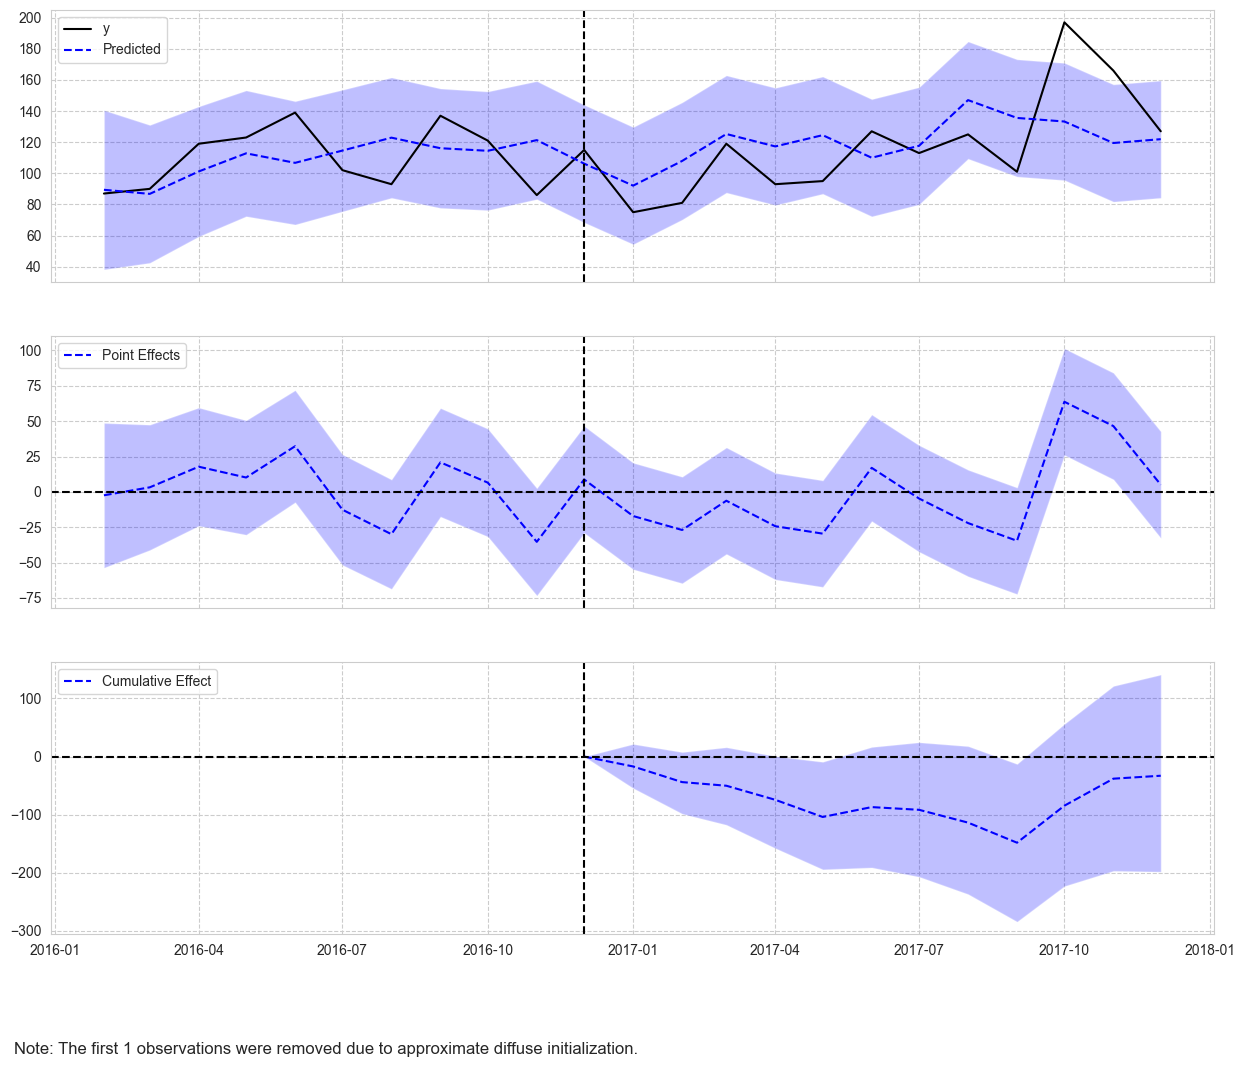

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 118.25. In the absence of an
intervention, we would have expected an average response of 121.0.
The 95% interval of this counterfactual prediction is [106.49, 134.77].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is -2.75 with a 95% interval of
[-16.52, 11.76]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 1419.0.
Had the intervention not taken place, we would have expected
a sum of 1452.05. The 95% interval of this prediction is [1277.84, 1617.27].


The above results are given in terms of absolute numbers. In relative
terms, the response variable showed a decreas

In [8]:
# SLOT 2
# Establish seed to ensure replicability
np.random.seed(7)
random.seed(7)

# load the data
df = pd.read_excel("datasetok.xls")
df.index = pd.to_datetime(df['fecha'])
df.drop('fecha', axis=1, inplace=True)

# Defines the pre-intervention and post-intervention period.
pre_period = ['2016-01-01', '2016-12-01']
post_period = ['2017-01-01', '2017-12-01']

# Adjusts the model and performs the CausalImpact analysis
impact = CausalImpact(df, pre_period, post_period)
print(impact.summary())
impact.plot()
print(impact.summary('report'))